In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("/Users/kirtisailinaidu/Downloads/Naive Bayes and Text Mining/blogs_categories.csv",encoding = "ISO-8859-1")


In [4]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [5]:
df.describe()

,Unnamed: 0
count,19997.000000
mean,9998.000000
std,5772.781002
min,0.000000
25%,4999.000000
50%,9998.000000
75%,14997.000000
max,19996.000000


In [10]:
df.groupby('Labels').describe()

Unnamed: 0                                          \
                              count     mean         std      min       25%   
Labels                                                                        
alt.atheism                  1000.0    499.5  288.819436      0.0    249.75   
comp.graphics                1000.0   1499.5  288.819436   1000.0   1249.75   
comp.os.ms-windows.misc      1000.0   2499.5  288.819436   2000.0   2249.75   
comp.sys.ibm.pc.hardware     1000.0   3499.5  288.819436   3000.0   3249.75   
comp.sys.mac.hardware        1000.0   4499.5  288.819436   4000.0   4249.75   
comp.windows.x               1000.0   5499.5  288.819436   5000.0   5249.75   
misc.forsale                 1000.0   6499.5  288.819436   6000.0   6249.75   
rec.autos                    1000.0   7499.5  288.819436   7000.0   7249.75   
rec.motorcycles              1000.0   8499.5  288.819436   8000.0   8249.75   
rec.sport.baseball           1000.0   9499.5  288.819436   9000.0   9249.75   
rec.sport.hockey             1000.0  10499.5  288.819436  10000.0  10249.75   
sci.crypt                    1000.0  11499.5  288.819436  11000.0  11249.75   
sci.electronics              1000.0  12499.5  288.819436  12000.0  12249.75   
sci.med                      1000.0  13499.5  288.819436  13000.0  13249.75   
sci.space                    1000.0  14499.5  288.819436  14000.0  14249.75   
soc.religion.christian        997.0  15498.0  287.953411  15000.0  15249.00   
talk.politics.guns           1000.0  16496.5  288.819436  15997.0  16246.75   
talk.politics.mideast        1000.0  17496.5  288.819436  16997.0  17246.75   
talk.politics.misc           1000.0  18496.5  288.819436  17997.0  18246.75   
talk.religion.misc           1000.0  19496.5  288.819436  18997.0  19246.75   

                                                      
                              50%       75%      max  
Labels                                                
alt.atheism                 499.5    749.25    999.0  
comp.graphics              1499.5   1749.25   1999.0  
comp.os.ms-windows.misc    2499.5   2749.25   2999.0  
comp.sys.ibm.pc.hardware   3499.5   3749.25   3999.0  
comp.sys.mac.hardware      4499.5   4749.25   4999.0  
comp.windows.x             5499.5   5749.25   5999.0  
misc.forsale               6499.5   6749.25   6999.0  
rec.autos                  7499.5   7749.25   7999.0  
rec.motorcycles            8499.5   8749.25   8999.0  
rec.sport.baseball         9499.5   9749.25   9999.0  
rec.sport.hockey          10499.5  10749.25  10999.0  
sci.crypt                 11499.5  11749.25  11999.0  
sci.electronics           12499.5  12749.25  12999.0  
sci.med                   13499.5  13749.25  13999.0  
sci.space                 14499.5  14749.25  14999.0  
soc.religion.christian    15498.0  15747.00  15996.0  
talk.politics.guns        16496.5  16746.25  16996.0  
talk.politics.mideast     17496.5  17746.25  17996.0  
talk.politics.misc        18496.5  18746.25  18996.0  
talk.religion.misc        19496.5  19746.25  19996.0

In [12]:
df['length']=df['Labels'].apply(len)

In [13]:
df.head()

,Unnamed: 0,Data,Labels,length
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,11
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,11
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,11
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,11
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,11


<Axes: ylabel='Frequency'>

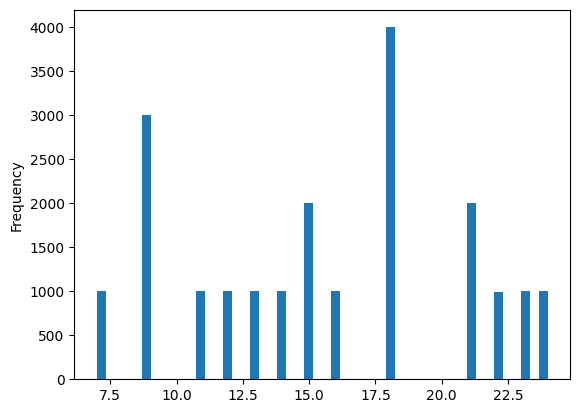

In [14]:
df['length'].plot(bins=50,kind='hist')

In [15]:
df.length.describe()

count    19997.000000
mean        15.649047
std          4.982611
min          7.000000
25%         11.000000
50%         15.000000
75%         18.000000
max         24.000000
Name: length, dtype: float64

In [22]:
df1 = df.copy()

In [23]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirtisailinaidu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
df1['Labels'] = df1['Labels'].apply(text_process)

In [33]:
df1.head()

,Unnamed: 0,Data,Labels,length
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,[altatheism],11
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,[altatheism],11
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,[altatheism],11
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,[altatheism],11
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,[altatheism],11


In [34]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df1['Labels'])

In [35]:
print(len(bow_transformer.vocabulary_))

20


In [36]:
exm_txt = df1['Labels'][3]

In [37]:
bow = (bow_transformer.transform([exm_txt]))
bow.shape

(1, 20)

In [41]:
bow_transformer.get_feature_names_out()[19]

'talkreligionmisc'

In [42]:
txt_bow = bow_transformer.transform(df1['Labels'])

In [43]:
print('rec.sport.baseball: ',txt_bow.shape)
print('talk.politics.guns:',txt_bow.nnz)

rec.sport.baseball:  (19997, 20)
talk.politics.guns: 19997


In [44]:
sparsity =(100.0 * txt_bow.nnz/(txt_bow.shape[0]*txt_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:5


In [45]:
tfidf_transformer=TfidfTransformer().fit(txt_bow)

In [46]:
tfidf_eg = tfidf_transformer.transform(bow)

In [47]:
txt_tfidf=tfidf_transformer.transform(txt_bow)
print(txt_tfidf.shape)

(19997, 20)


In [49]:
x_train,x_test,y_train,y_test = train_test_split(df1['Labels'],df1['Data'],test_size=0.2)


In [50]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [51]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x30ad913a0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [52]:
predictions = pipeline.predict(x_test)

In [ ]:
print(classification_report(predictions,y_test))

/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
